<a href="https://colab.research.google.com/github/mnocerino23/Numerical-Analysis/blob/main/CSCI166_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3 Code - CSCI 166

# Problem 1a: 

In [1]:
import pandas as pd
values = pd.DataFrame(columns = ['n', 'pn','en', 'en/(en-1)', 'en/(en-1)^2', 'en/(en-1)^3'])

In [2]:
#create the empty pandas dataframe with the appropriate column headings to organize our calcuations
values

,n,pn,en,en/(en-1),en/(en-1)^2,en/(en-1)^3


In [3]:
import math
#create some columns that we will append to at each iteration. At first we will store the values for n = 0
#where we are told that po = 1

column1 = [0]
column2 = [1]
column3 = [1.23606798]
#these cannot exist yet since we are only given term one
column4 = ['undefined']
column5 = ['undefined']
column6 = ['undefined']

In [4]:
for i in range(6):
  #get the last item in column 2 to get pn-1
  previous_term = column2[-1]
  next_term = (0.5)* ((previous_term)+ (5/previous_term))
  error = abs((next_term - math.sqrt(5)))
  previous_error = column3[-1]

  column1.append(i+1)
  column2.append(next_term)
  column3.append(error)
  column4.append(error/previous_error)
  column5.append(error/(previous_error**2))
  column6.append(error/(previous_error**3))

In [5]:
values['n'] = column1
values['pn'] = column2
values['en'] = column3
values['en/(en-1)'] = column4
values['en/(en-1)^2'] = column5
values['en/(en-1)^3'] = column6

In [6]:
#our final table called values with values for n = 0 to n = 6
values

,n,pn,en,en/(en-1),en/(en-1)^2,en/(en-1)^3
0,0,1.000000,1.236068e+00,undefined,undefined,undefined
1,1,3.000000,7.639320e-01,0.618034,0.5,0.404508
2,2,2.333333,9.726536e-02,0.127322,0.166667,0.218169
3,3,2.238095,2.027261e-03,0.020843,0.214286,2.203104
4,4,2.236069,9.181436e-07,0.000453,0.223404,110.200068
5,5,2.236068,1.882938e-13,0.0,0.223365,243278.809189
6,6,2.236068,0.000000e+00,0.0,0.0,0.0


# Problem 1b:

In [7]:
#create a second table called table
table = pd.DataFrame(columns = ['n', 'pn','en', 'en/(en-1)', 'en/(en-1)^2', 'en/(en-1)^3'])

In [8]:
col1 = [0]
col2 = [1]
col3 = [1.23606798]
#these cannot exist yet since we are only given term one
col4 = ['undefined']
col5 = ['undefined']
col6 = ['undefined']

In [9]:
for i in range(4):
  #get the last item in column 2 to get pn-1
  previous_term = col2[-1]
  next_term = (((previous_term**3)+ (15*previous_term))/((3*(previous_term**2)) + 5))
  error = abs((next_term - math.sqrt(5)))
  previous_error = col3[-1]

  col1.append(i+1)
  col2.append(next_term)
  col3.append(error)
  col4.append(error/previous_error)
  col5.append(error/(previous_error**2))
  col6.append(error/(previous_error**3))

In [10]:
table['n'] = col1
table['pn'] = col2
table['en'] = col3
table['en/(en-1)'] = col4
table['en/(en-1)^2'] = col5
table['en/(en-1)^3'] = col6

In [11]:
table

,n,pn,en,en/(en-1),en/(en-1)^2,en/(en-1)^3
0,0,1.000000,1.236068e+00,undefined,undefined,undefined
1,1,2.000000,2.360680e-01,0.190983,0.154508,0.125
2,2,2.235294,7.738599e-04,0.003278,0.013886,0.058824
3,3,2.236068,2.318368e-11,0.0,0.000039,0.050026
4,4,2.236068,0.000000e+00,0.0,0.0,0.0


# Problem 3: Rootfinding and Optimization

# 3c and 3d:

In [12]:
import numpy as np

In [13]:
def get_midpoint(endpoint1, endpoint2):
  return ((endpoint1+endpoint2)/2)

In [14]:
#define f'(x) using numpy in Python
#note in python, writing log(x) defaults to natural log
#we want to find the zeros of fprime using the rootfinding methods

def fprime(x):
  return ((1/x)- np.cos(x))

In [15]:
#confirm that our function works correctly
fprime(5)

-0.08366218546322624

In [16]:
#creating a function to implement the bisection method
#Note: I have named the variable for pn as midpoint in this implementation

def bisection_method(function, a, b, iterations):
  for i in range(iterations):
    midpoint = get_midpoint(a,b)

    if np.sign(function(midpoint)) == np.sign(function(a)):
      #don't change b, a becomes midpoint
      a = midpoint
    elif np.sign(function(midpoint)) == np.sign(function(b)): 
      #don't change a, b becomes midpoint
      b = midpoint
    #print('Endpoints at iteration', i+1, ': ', a, ',', b)
  #print('Root from Bisection Method: ', midpoint)
  return midpoint

In [17]:
#the root p that is found using my implementation of the bisection method
bisection_method(fprime, 4, 6, 12)

4.91748046875

In [18]:
#implementing the false position method
#note the function 

def false_position(function, a, b, iterations):

  for i in range(iterations):
    root_of_secant = (function(b)* (b-a))/(function(b)-function(a))
    midpoint = b - root_of_secant

    if np.sign(function(midpoint)) == np.sign(function(a)):
      #don't change b, a becomes midpoint
      a = midpoint
    elif np.sign(function(midpoint)) == np.sign(function(b)): 
      #don't change a, b becomes midpoint
      b = midpoint
    #print('Endpoints at iteration', i+1, ': ', a, ',', b)
  #print('Root from Method of False Position: ', midpoint)
  return midpoint

In [19]:
#the root p that is found using my implementation 
false_position(fprime, 4, 6, 12)

4.917185925287132

# 3e:

In [20]:
first = pd.DataFrame(columns = ['Iteration n', 'Root Approximation: Bisection', 'Root Approximation: False Position'])
first['Iteration n'] = range(12)

In [21]:
#fill up the table of the first twelve iterations
for index, row in first.iterrows():
  first.at[index, 'Root Approximation: Bisection'] = bisection_method(fprime, 4, 6, index+1)
  first.at[index, 'Root Approximation: False Position'] = false_position(fprime, 4, 6, index+1)

In [22]:
first.head(12)

,Iteration n,Root Approximation: Bisection,Root Approximation: False Position
0,0,5.0,5.064897
1,1,4.5,4.915193
2,2,4.75,4.917225
3,3,4.875,4.917186
4,4,4.9375,4.917186
5,5,4.90625,4.917186
6,6,4.921875,4.917186
7,7,4.914062,4.917186
8,8,4.917969,4.917186
9,9,4.916016,4.917186


In [23]:
second = pd.DataFrame(columns = ['Iteration n', 'Absolute Error: Bisection', 'Absolute Error: False Position'])
second['Iteration n'] = range(12)

In [24]:
#the accepted value of p
p = 4.9171859252871323

In [25]:
for index, row in second.iterrows():
  second.at[index, 'Absolute Error: Bisection'] = abs(p - bisection_method(fprime, 4, 6, index+1))
  second.at[index, 'Absolute Error: False Position'] = abs(p- false_position(fprime, 4, 6, index+1))

In [26]:
#from our table, we see that the method of false position finds the root quicker for this example
#the absolute error converges to zero quicker for the method of false position in this example.

second.head(12)

,Iteration n,Absolute Error: Bisection,Absolute Error: False Position
0,0,0.082814,0.147711
1,1,0.417186,0.001993
2,2,0.167186,0.000039
3,3,0.042186,0.0
4,4,0.020314,0.0
5,5,0.010936,0.0
6,6,0.004689,0.0
7,7,0.003123,0.0
8,8,0.000783,0.0
9,9,0.00117,0.0


# 3f: Plot the log of the absolute error for the two methods on the same graph

In [27]:
#store dictionary maps mapping the iteration number to the absolute error at that iteration
bisection_absolute_error = dict(zip(second['Iteration n'], second['Absolute Error: Bisection']))
falseposition_absolute_error = dict(zip(second['Iteration n'], second['Absolute Error: False Position']))

In [28]:
import matplotlib.pyplot as plt

In [29]:
inputs = [1,2,3,4,5,6,7,8,9,10,11,12]
bisection_outputs = []
fp_outputs = []

for item in inputs:
  bisection_outputs.append(np.log(abs(p - bisection_method(fprime, 4, 6, item))))
  fp_outputs.append(np.log(abs(p - false_position(fprime, 4, 6, item))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


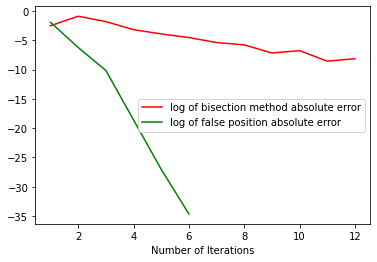

In [31]:
x = inputs

y = bisection_outputs
z = fp_outputs
plt.xlabel('Number of Iterations')
plt.plot(x, y, color='r', label='log of bisection method absolute error')
plt.plot(x, z, color='g', label='log of false position absolute error')
plt.legend()
plt.show()